In [1]:
import utils
import networks
from plot_utils import plot_confmat

import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
train_set = datasets.ImageFolder(root=utils.dirs['train'], transform=utils.transform['test'])
test_set = datasets.ImageFolder(root=utils.dirs['test'], transform=utils.transform['test'])
train_dl = DataLoader(train_set, batch_size=128)
test_dl = DataLoader(test_set, batch_size=80)

### VGG-16

In [4]:
vgg16 = networks.get_vgg16(out_features=4, path='models/lr3e-5_vgg_cuda.pth')
train_preds = utils.get_all_preds(vgg16, train_dl)
test_preds = utils.get_all_preds(vgg16, test_dl)

train_preds.shape, test_preds.shape

(torch.Size([21005, 4]), torch.Size([80, 4]))

In [5]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 20826	Train Accuracy: 99.15%
Test Correct:     77	Test Accuracy:  96.25%


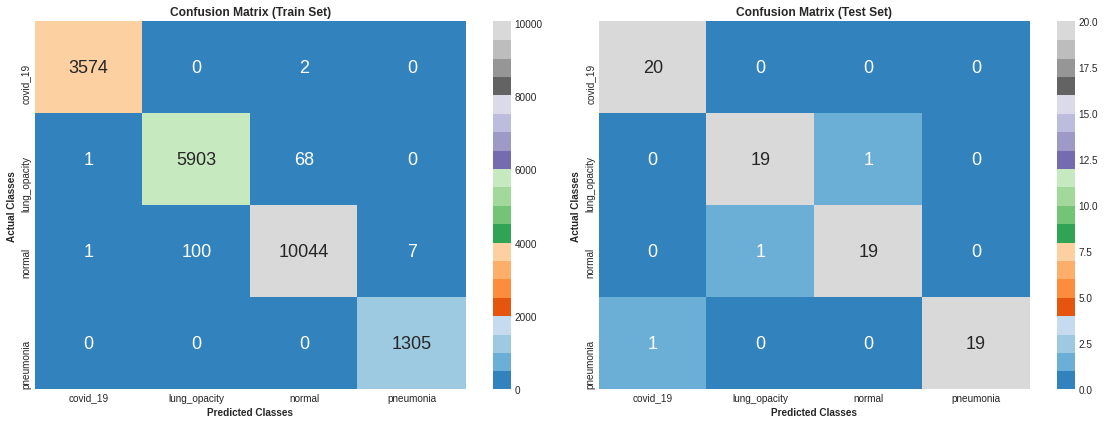

In [6]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

In [7]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9871794871794872, 0.9523809523809523, 1.0, 0.975609756097561],
 'lung_opacity': [0.9746835443037974, 0.95, 0.95, 0.9500000000000001],
 'normal': [0.9746835443037974, 0.95, 0.95, 0.9500000000000001],
 'pneumonia': [0.9871794871794872, 1.0, 0.95, 0.9743589743589743]}

### ResNet-18

In [8]:
resnet18 = networks.get_resnet18(out_features=4, path='models/lr3e-5_resnet_cuda.pth')
train_preds = utils.get_all_preds(resnet18, train_dl)
test_preds = utils.get_all_preds(resnet18, test_dl)

train_preds.shape, test_preds.shape

(torch.Size([21005, 4]), torch.Size([80, 4]))

In [9]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 20889	Train Accuracy: 99.45%
Test Correct:     76	Test Accuracy:  95.00%


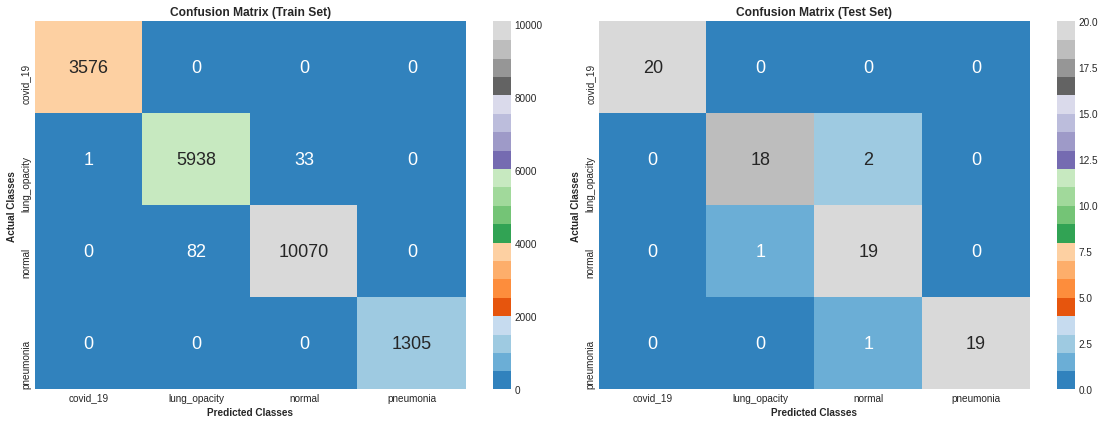

In [10]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(resnet18).__name__.lower()}')

In [11]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [1.0, 1.0, 1.0, 1.0],
 'lung_opacity': [0.9620253164556962,
  0.9473684210526315,
  0.9,
  0.9230769230769231],
 'normal': [0.95, 0.8636363636363636, 0.95, 0.9047619047619048],
 'pneumonia': [0.987012987012987, 1.0, 0.95, 0.9743589743589743]}

### DenseNet-121

In [12]:
densenet121 = networks.get_densenet121(out_features=4, path='models/lr3e-5_densenet_cuda.pth')
train_preds = utils.get_all_preds(densenet121, train_dl)
test_preds = utils.get_all_preds(densenet121, test_dl)

train_preds.shape, test_preds.shape

(torch.Size([21005, 4]), torch.Size([80, 4]))

In [13]:
train_correct = utils.get_num_correct(train_preds, torch.as_tensor(train_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Train Correct: {train_correct:5}\tTrain Accuracy: {(100*train_correct/len(train_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Train Correct: 20895	Train Accuracy: 99.48%
Test Correct:     78	Test Accuracy:  97.50%


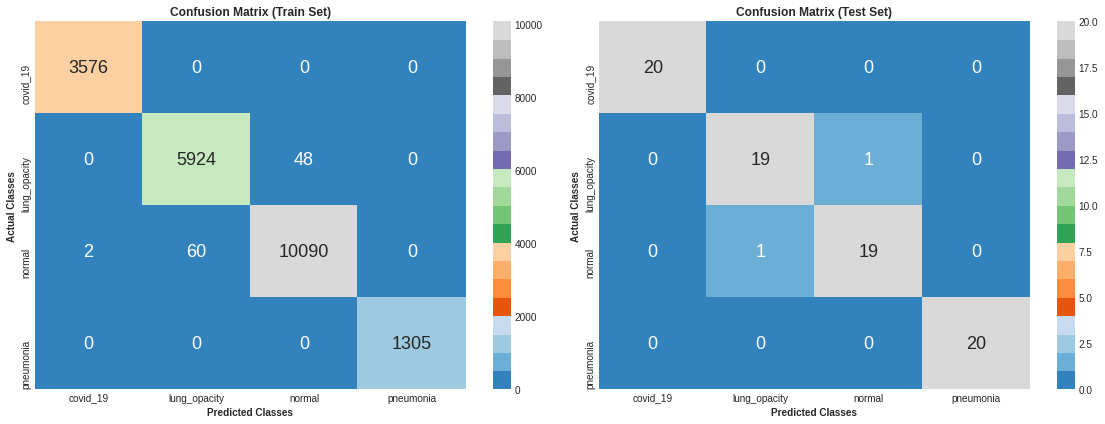

In [14]:
train_confmat = utils.get_confmat(train_set.targets, train_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(train_confmat, test_confmat, train_set.classes, f'{type(densenet121).__name__.lower()}')

In [15]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [1.0, 1.0, 1.0, 1.0],
 'lung_opacity': [0.975, 0.95, 0.95, 0.9500000000000001],
 'normal': [0.975, 0.95, 0.95, 0.9500000000000001],
 'pneumonia': [1.0, 1.0, 1.0, 1.0]}